supp figure 4A

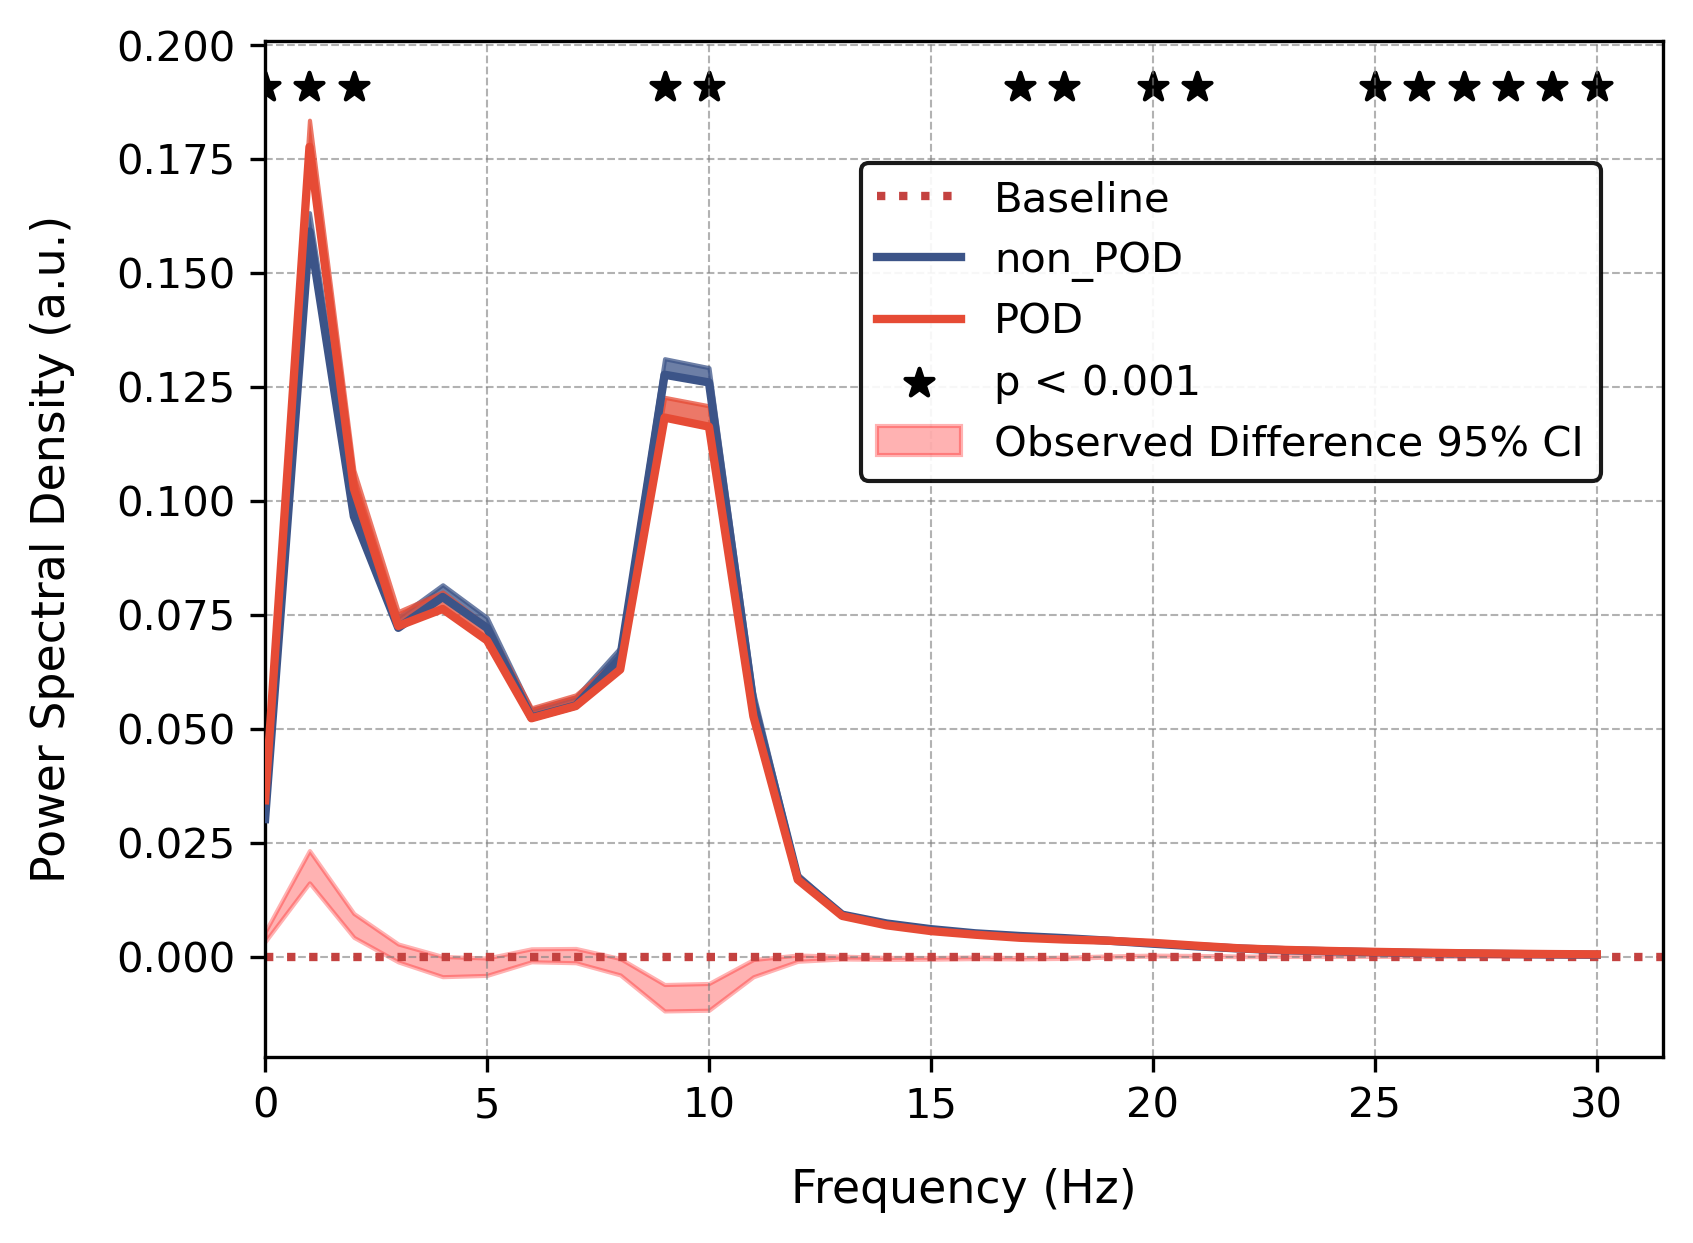

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

load_path = '../dataset/PSD_comparison_all.pkl'
with open(load_path, 'rb') as f:
    results = pickle.load(f)

freqs_nonPOD = results['freqs_nonPOD']
freqs_POD = results['freqs_POD']
freq_limit = 30
freq_mask = freqs_POD <= freq_limit

psd_nonPOD = results['psd_nonPOD_30']
psd_POD = results['psd_POD_30']
mean_psd_nonPOD = np.mean(psd_nonPOD, axis=0)
mean_psd_POD = np.mean(psd_POD, axis=0)

ci_lower_nonPOD = results['ci_lower_nonPOD']
ci_upper_nonPOD = results['ci_upper_nonPOD']
ci_lower_POD = results['ci_lower_POD']
ci_upper_POD = results['ci_upper_POD']

observed_diff = results['observed_diff']
ci_lower_diff = results['ci_lower_diff']
ci_upper_diff = results['ci_upper_diff']

pvals_corrected = results['pvals_corrected']

plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300,
    'savefig.dpi': 300,  
    'axes.linewidth': 0.8  
})

POD_color = '#E64B35'
non_POD_color = '#3C5488'

plt.figure(figsize=(6, 4.5))  
plt.axhline(y=0, color='#C44240', linestyle=':', linewidth=2, label='Baseline')

plt.plot(freqs_nonPOD[freq_mask], ci_lower_nonPOD, label='non_POD', color=non_POD_color, linewidth=2, zorder=3)
plt.fill_between(freqs_nonPOD[freq_mask], ci_lower_nonPOD, ci_upper_nonPOD, color=non_POD_color, alpha=0.75, zorder=2)

plt.plot(freqs_POD[freq_mask], ci_lower_POD, label='POD', color=POD_color,  linewidth=2, zorder=3)
plt.fill_between(freqs_POD[freq_mask], ci_lower_POD, ci_upper_POD, color=POD_color, alpha=0.75, zorder=2)

significant_freqs = freqs_nonPOD[freq_mask][pvals_corrected < 0.001]
star_height = np.full(len(mean_psd_POD[pvals_corrected < 0.001]), np.max(mean_psd_POD) + 0.01)
significant_values = mean_psd_POD[pvals_corrected < 0.001] 
plt.scatter(significant_freqs, star_height, color='k', marker='*', s=50, label="p < 0.001")
plt.fill_between(freqs_nonPOD[freq_mask], ci_lower_diff, ci_upper_diff, color='red',  alpha=0.3, label='Observed Difference 95% CI')

plt.xlabel('Frequency (Hz)', labelpad=10)
plt.ylabel('Power Spectral Density (a.u.)', labelpad=10)  
plt.xlim(left=0) 
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6, color='gray')
plt.legend(loc='upper right', bbox_to_anchor=(0.97, 0.9), frameon=True, framealpha=0.9, edgecolor='black')
plt.tight_layout(pad=2)
plt.savefig('figure/supp_4A.tiff', bbox_inches='tight', pil_kwargs={"compression": "tiff_lzw"})
plt.show()

supp figure 4B

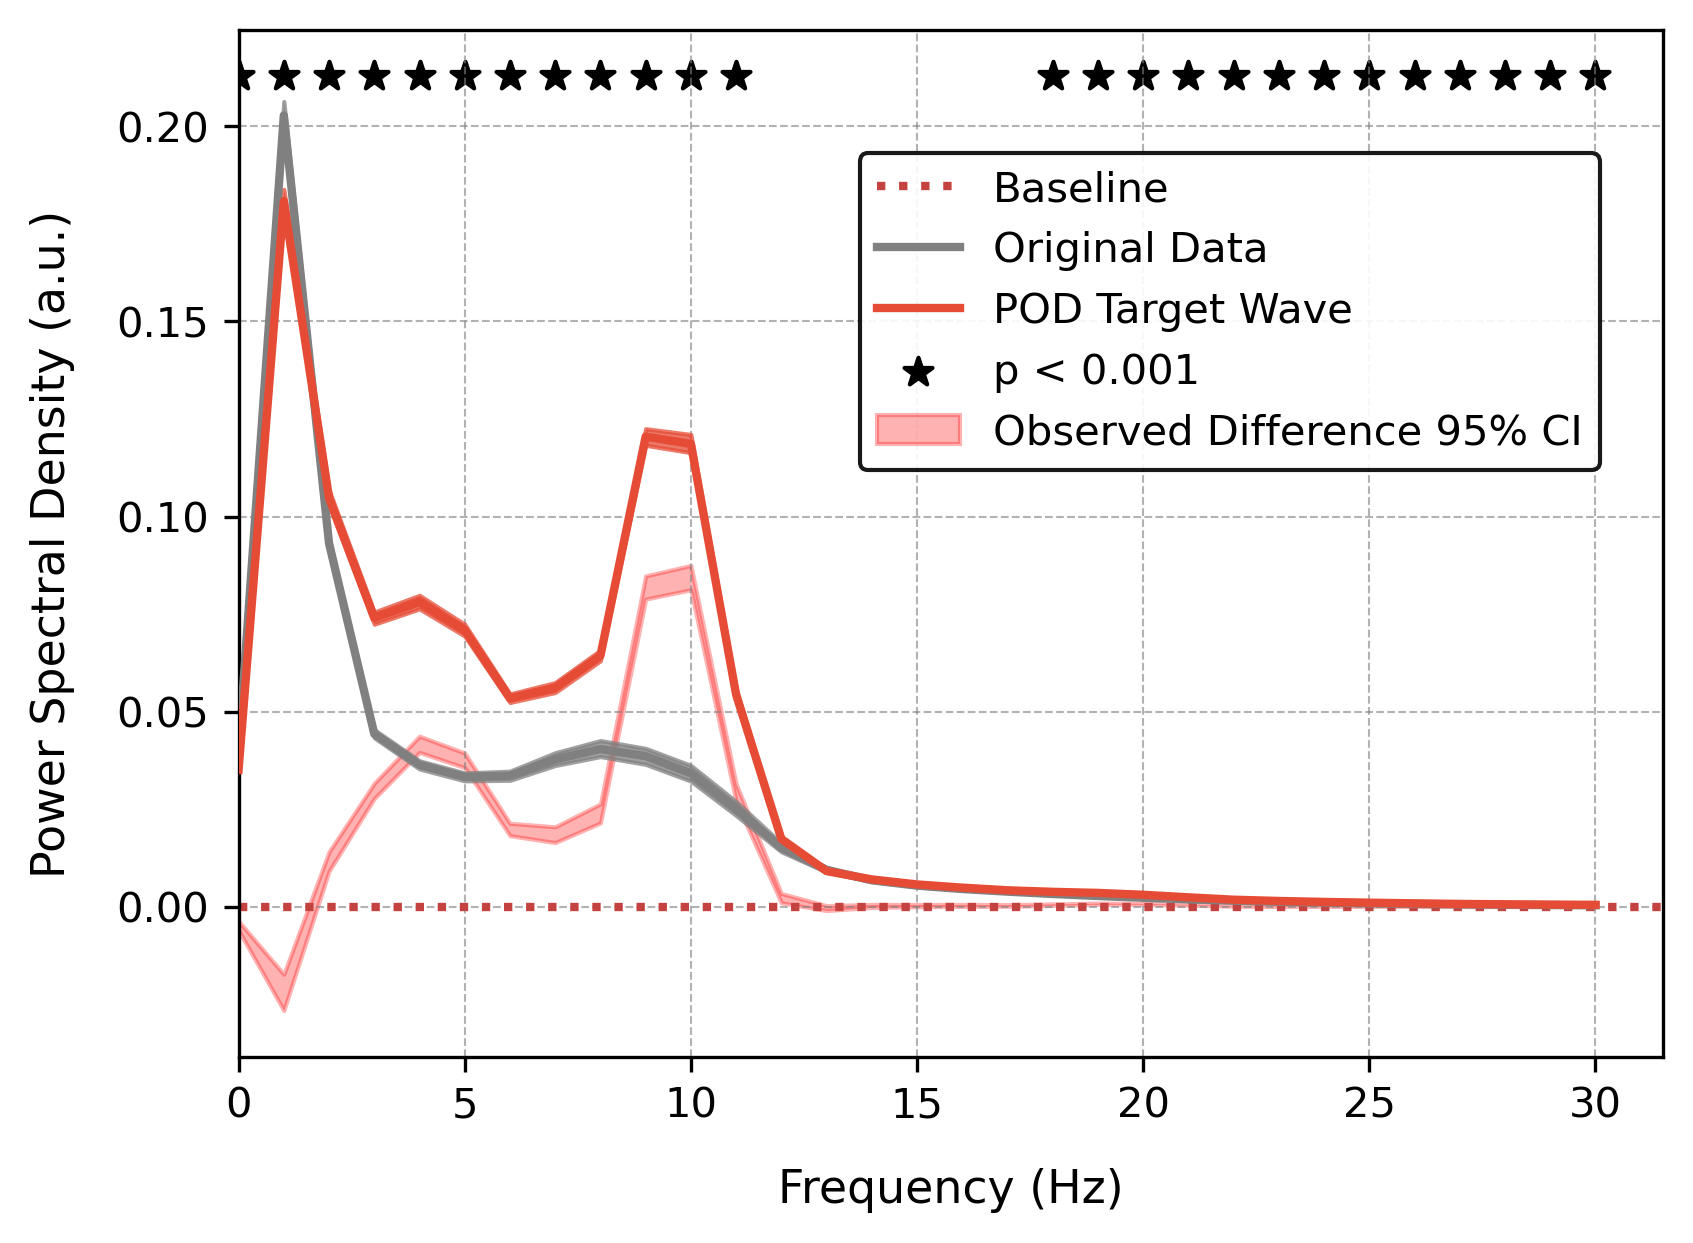

In [37]:
load_path = '../dataset/PSD_comparison_POD.pkl'
with open(load_path, 'rb') as f:
    results = pickle.load(f)

freqs_ori = results['freqs_ori']
freqs_target = results['freqs_target']
freq_limit = 30
freq_mask = freqs_target <= freq_limit
psd_ori = results['psd_ori_30']
psd_target = results['psd_target_30']
mean_psd_ori = np.mean(psd_ori, axis=0)
mean_psd_target = np.mean(psd_target, axis=0)

ci_lower_ori = results['ci_lower_ori']
ci_upper_ori = results['ci_upper_ori']
ci_lower_target = results['ci_lower_target']
ci_upper_target = results['ci_upper_target']

observed_diff = results['observed_diff']
ci_lower_diff = results['ci_lower_diff']
ci_upper_diff = results['ci_upper_diff']

pvals_corrected = results['pvals_corrected']

plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300,
    'savefig.dpi': 300,  
    'axes.linewidth': 0.8  
})

POD_color = '#E64B35'
original_color = "gray"

plt.figure(figsize=(6, 4.5))  
plt.axhline(y=0, color='#C44240', linestyle=':', linewidth=2, label='Baseline')

plt.plot(freqs_ori[freq_mask], mean_psd_ori, label='Original Data', color=original_color, linewidth=2, zorder=3)
plt.fill_between(freqs_ori[freq_mask], ci_lower_ori, ci_upper_ori, color=original_color, alpha=0.75, zorder=2)

plt.plot(freqs_target[freq_mask], mean_psd_target, label='POD Target Wave', color=POD_color,  linewidth=2, zorder=3)
plt.fill_between(freqs_target[freq_mask], ci_lower_target, ci_upper_target, color=POD_color, alpha=0.75, zorder=2)

significant_freqs = freqs_ori[freq_mask][pvals_corrected < 0.001]
star_height = np.full(len(mean_psd_target[pvals_corrected < 0.001]), np.max(mean_psd_ori) + 0.01)
significant_values = mean_psd_target[pvals_corrected < 0.001] 
plt.scatter(significant_freqs, star_height, color='k', marker='*', s=50, label="p < 0.001")
plt.fill_between(freqs_ori[freq_mask], ci_lower_diff, ci_upper_diff, color='red',  alpha=0.3, label='Observed Difference 95% CI')

plt.xlabel('Frequency (Hz)', labelpad=10)
plt.ylabel('Power Spectral Density (a.u.)', labelpad=10)  
plt.xlim(left=0) 
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6, color='gray')
plt.legend(loc='upper right', bbox_to_anchor=(0.97, 0.9), frameon=True, framealpha=0.9, edgecolor='black')
plt.tight_layout(pad=2)
plt.savefig('figure/supp_4B.tiff', bbox_inches='tight', pil_kwargs={"compression": "tiff_lzw"})
plt.show()

supp figure 4C

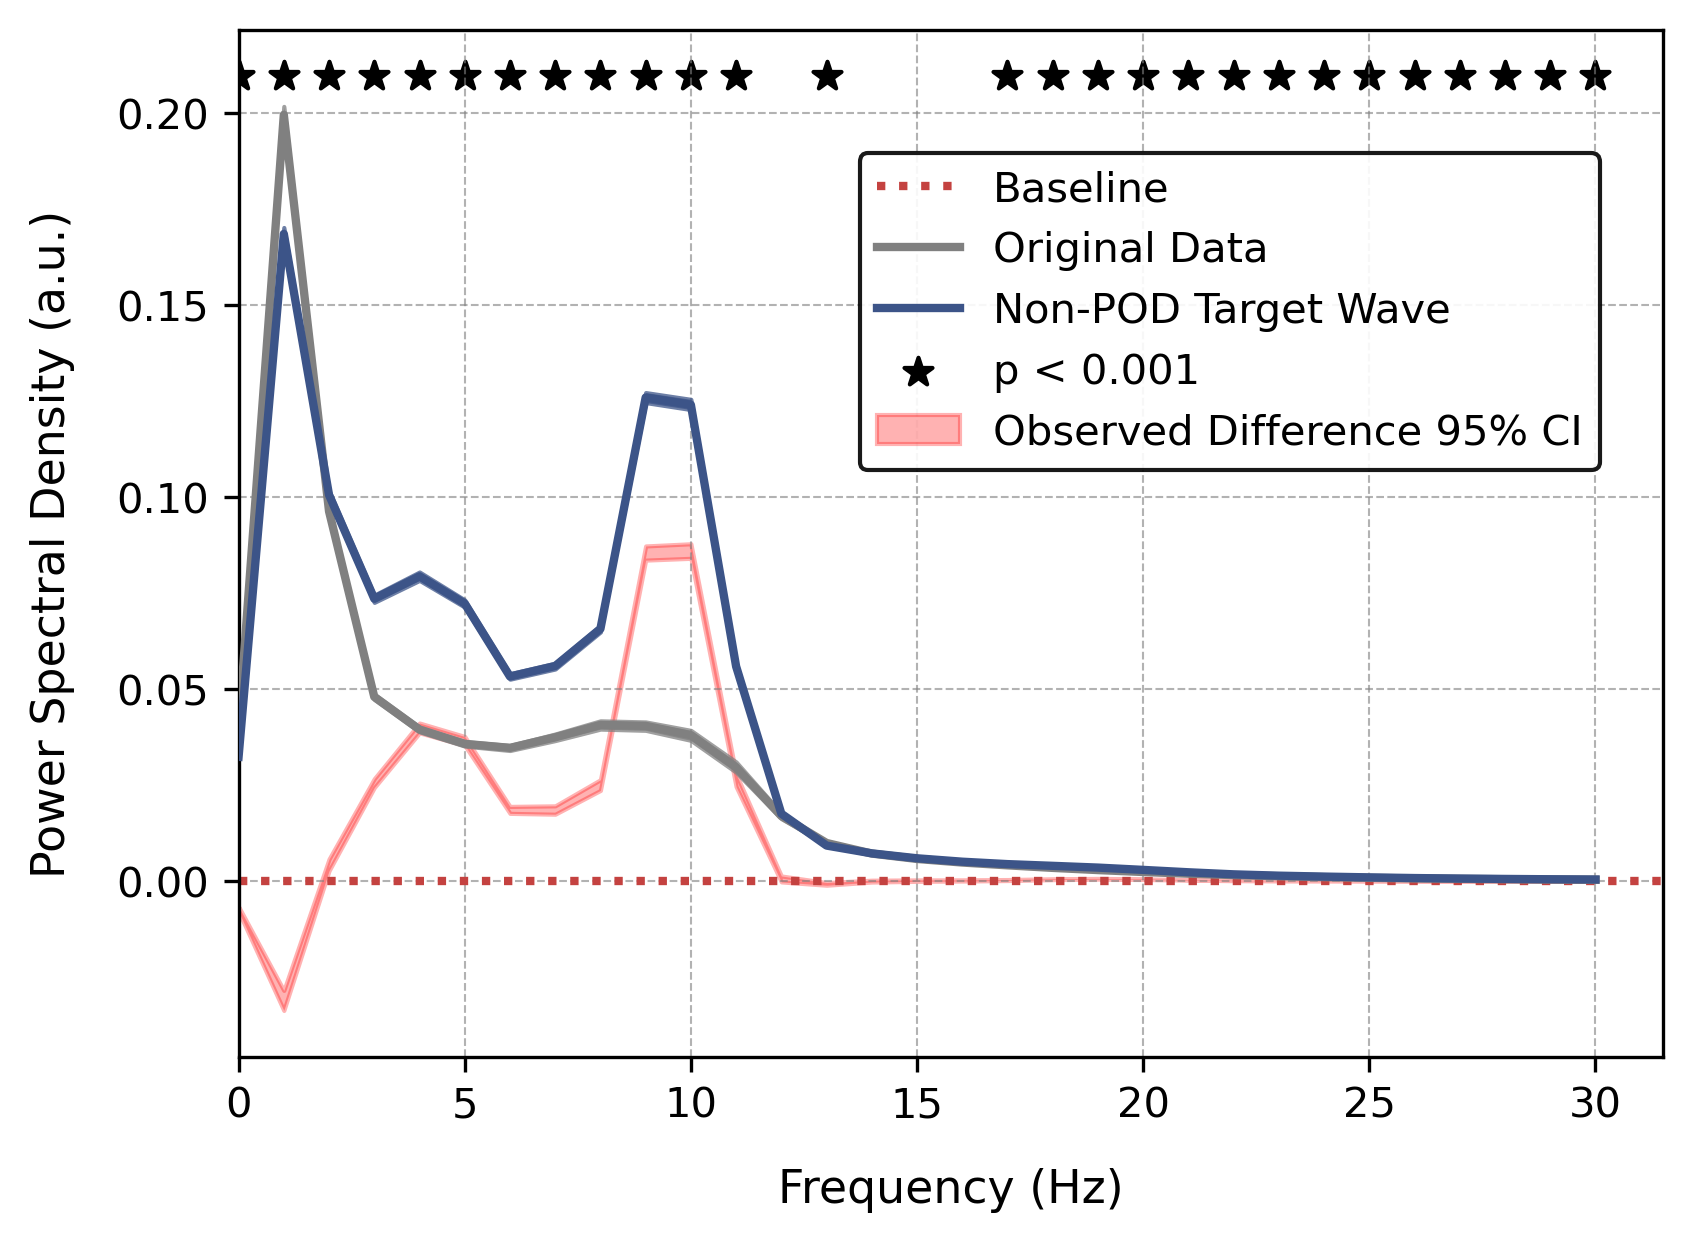

In [ ]:
load_path = '../dataset/PSD_comparison_nonPOD.pkl'
with open(load_path, 'rb') as f:
    results = pickle.load(f)

freqs_ori = results['freqs_ori']
freqs_target = results['freqs_target']
freq_limit = 30
freq_mask = freqs_target <= freq_limit
psd_ori = results['psd_ori_30']
psd_target = results['psd_target_30']
mean_psd_ori = np.mean(psd_ori, axis=0)
mean_psd_target = np.mean(psd_target, axis=0)

ci_lower_ori = results['ci_lower_ori']
ci_upper_ori = results['ci_upper_ori']
ci_lower_target = results['ci_lower_target']
ci_upper_target = results['ci_upper_target']

observed_diff = results['observed_diff']
ci_lower_diff = results['ci_lower_diff']
ci_upper_diff = results['ci_upper_diff']

pvals_corrected = results['pvals_corrected']

plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300,
    'savefig.dpi': 300,  
    'axes.linewidth': 0.8  
})

non_POD_color = '#3C5488'
original_color = "gray"

plt.figure(figsize=(6, 4.5))  
plt.axhline(y=0, color='#C44240', linestyle=':', linewidth=2, label='Baseline')

plt.plot(freqs_ori[freq_mask], mean_psd_ori, label='Original Data', color=original_color, linewidth=2, zorder=3)
plt.fill_between(freqs_ori[freq_mask], ci_lower_ori, ci_upper_ori, color=original_color, alpha=0.75, zorder=2)

plt.plot(freqs_target[freq_mask], mean_psd_target, label='Non-POD Target Wave', color=non_POD_color,  linewidth=2, zorder=3)
plt.fill_between(freqs_target[freq_mask], ci_lower_target, ci_upper_target, color=non_POD_color, alpha=0.75, zorder=2)

significant_freqs = freqs_ori[freq_mask][pvals_corrected < 0.001]
star_height = np.full(len(mean_psd_target[pvals_corrected < 0.001]), np.max(mean_psd_ori) + 0.01)
significant_values = mean_psd_target[pvals_corrected < 0.001] 
plt.scatter(significant_freqs, star_height, color='k', marker='*', s=50, label="p < 0.001")
plt.fill_between(freqs_ori[freq_mask], ci_lower_diff, ci_upper_diff, color='red',  alpha=0.3, label='Observed Difference 95% CI')

plt.xlabel('Frequency (Hz)', labelpad=10)
plt.ylabel('Power Spectral Density (a.u.)', labelpad=10)  
plt.xlim(left=0) 
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6, color='gray')
plt.legend(loc='upper right', bbox_to_anchor=(0.97, 0.9), frameon=True, framealpha=0.9, edgecolor='black')
plt.tight_layout(pad=2)
plt.savefig('figure/supp_4C.tiff', bbox_inches='tight', pil_kwargs={"compression": "tiff_lzw"})
plt.show()